In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
#--------------------get the data--------------------
kdata = pd.read_excel('D:/Habiba/Route AI&ML/Assignments Qs/Assignment 8 knn/data.xlsx')
kdata

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [4]:
#--------------------Exploratory Data Analysis--------------------
kdata.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
kdata.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [6]:
kdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
kdata.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [8]:
kdata.shape

(900, 8)

In [9]:
kdata['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
kdata['Class']=le.fit_transform(kdata['Class'])

In [13]:
kdata['Class']

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int32

In [14]:
kdata

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [15]:
kdata['Class'].value_counts()

1    450
0    450
Name: Class, dtype: int64

In [ ]:
#----------------Visualizing the dataset-------------------

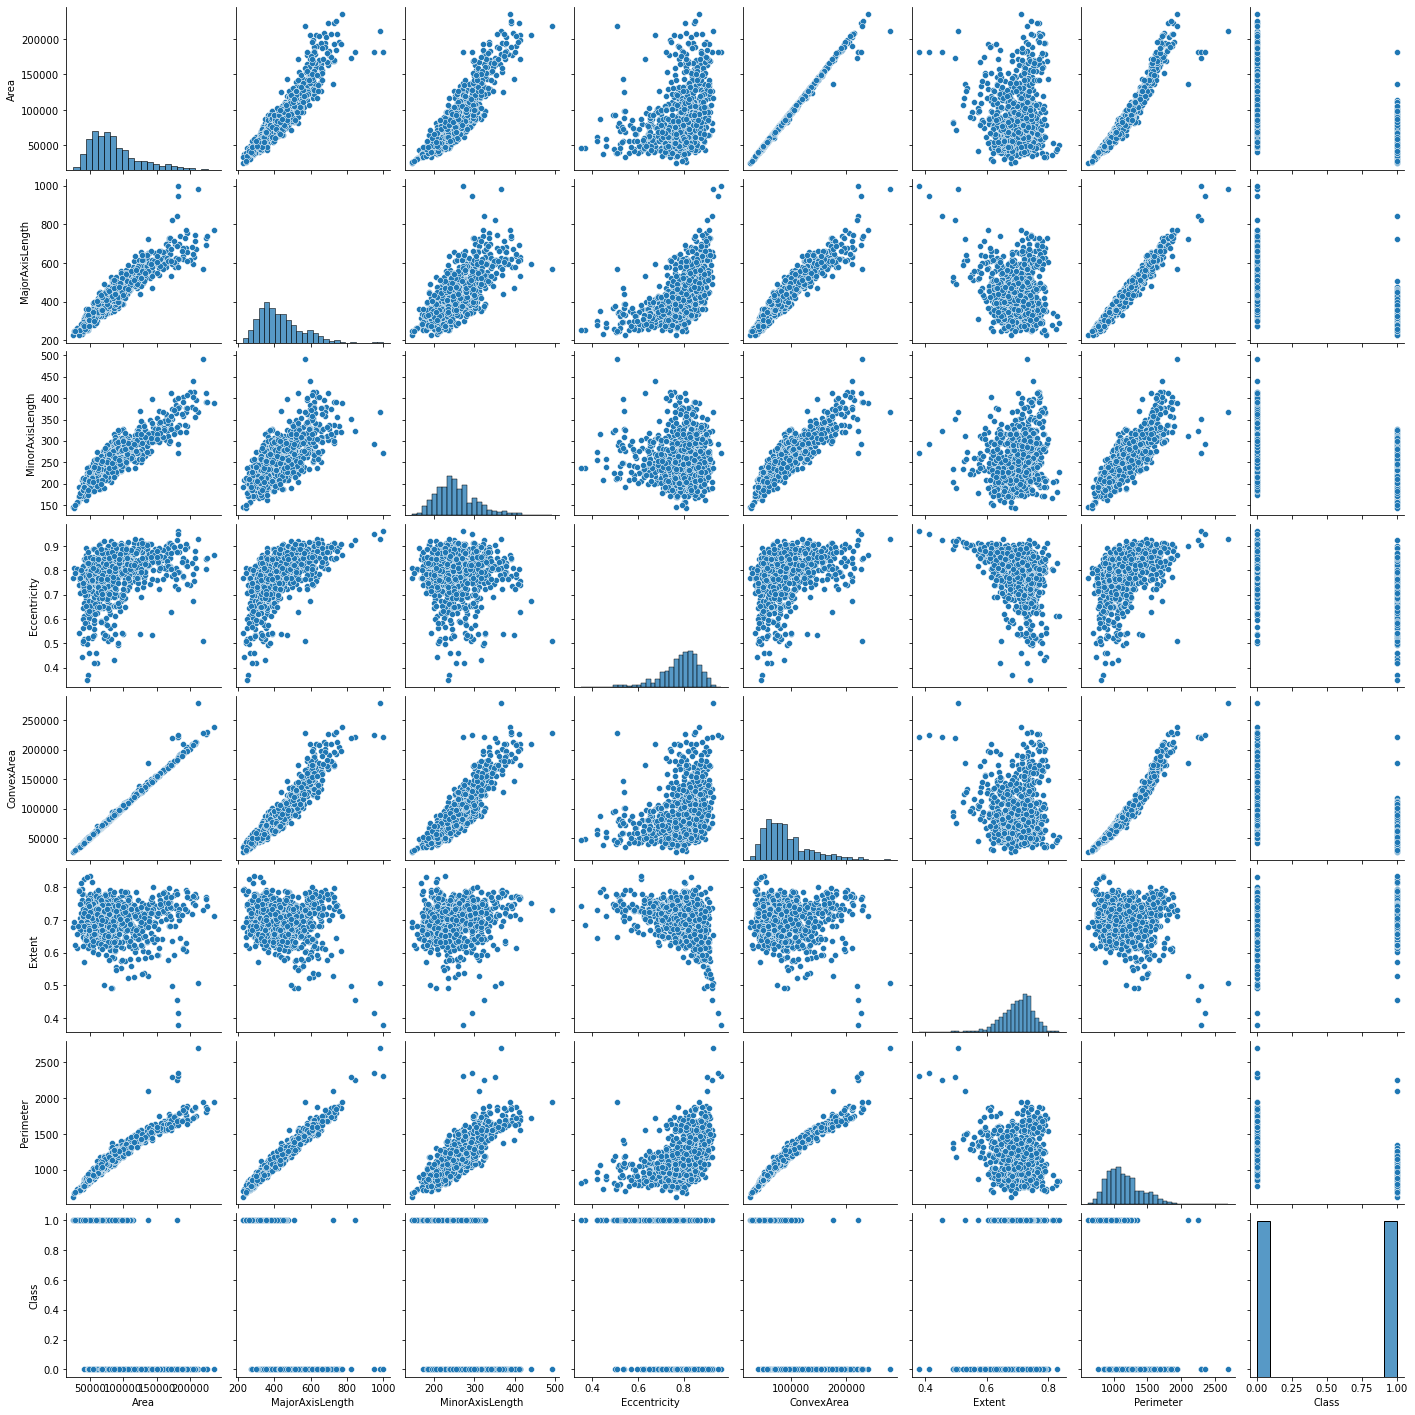

In [18]:
sns.pairplot(kdata)

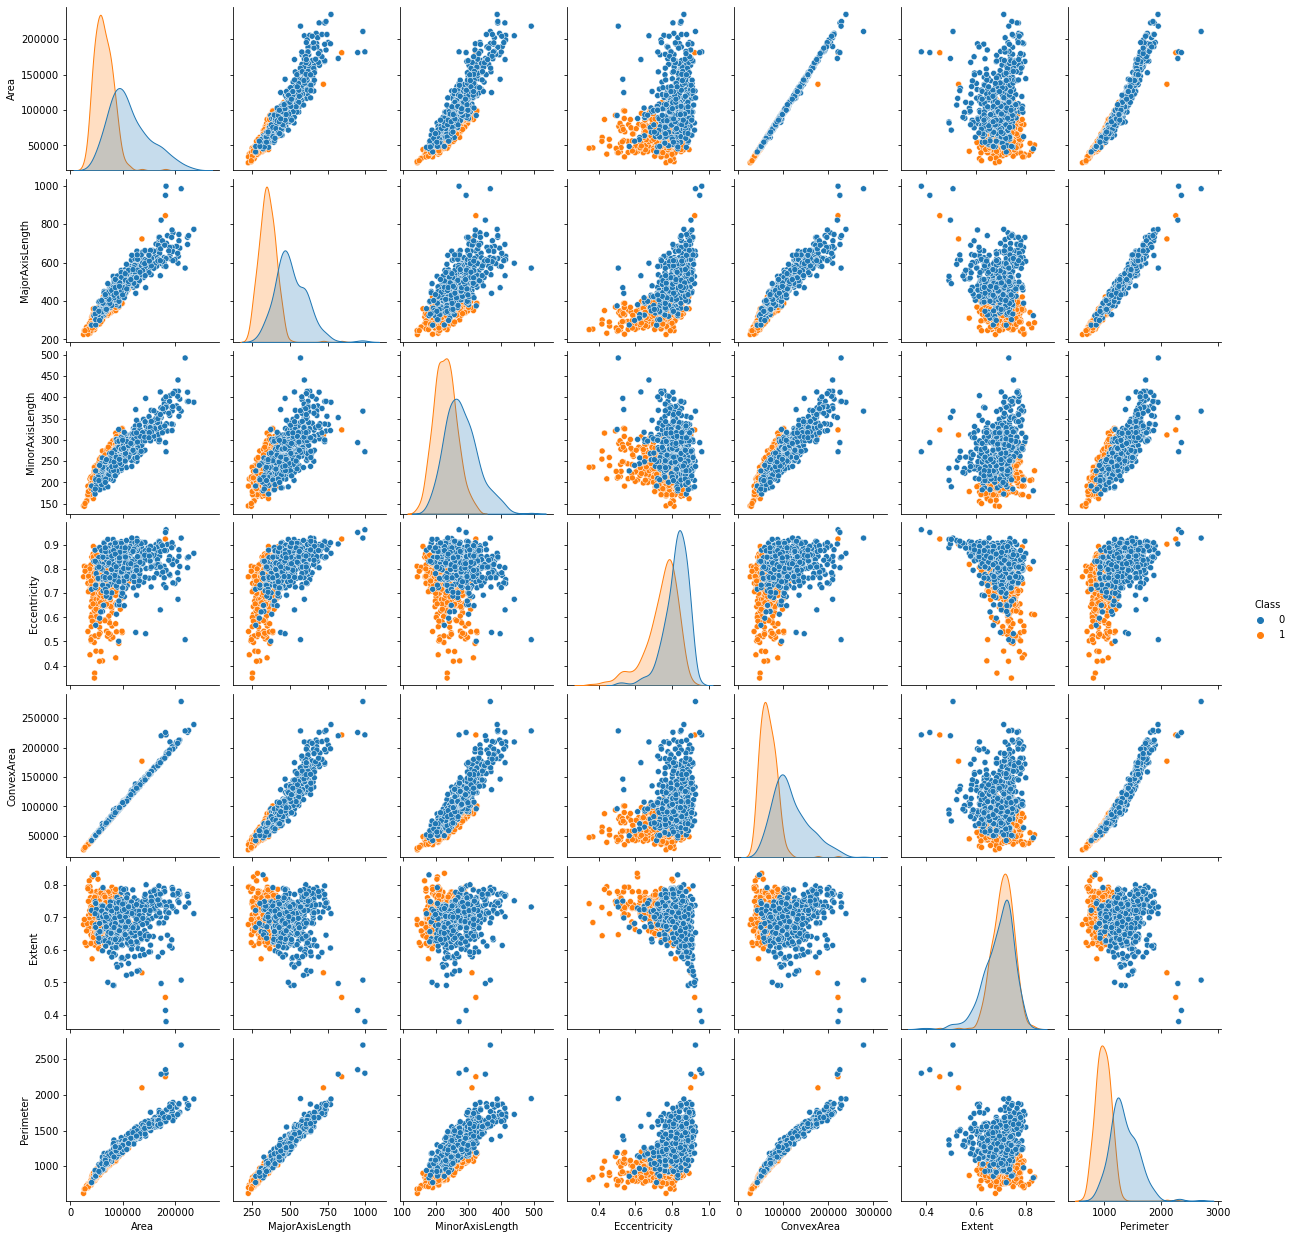

In [47]:
sns.pairplot(kdata, hue='Class')

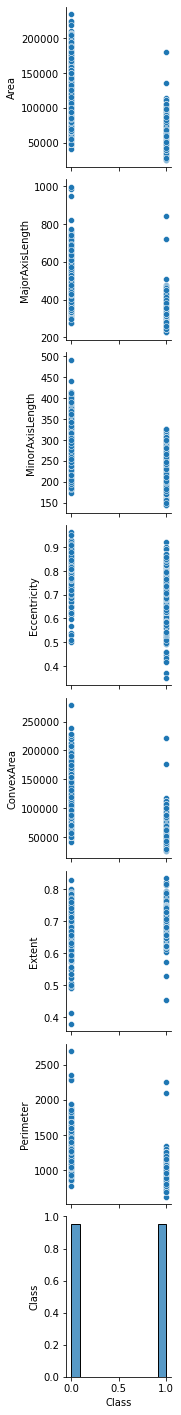

In [26]:
sns.pairplot(kdata , x_vars=['Class'] )

<AxesSubplot:>

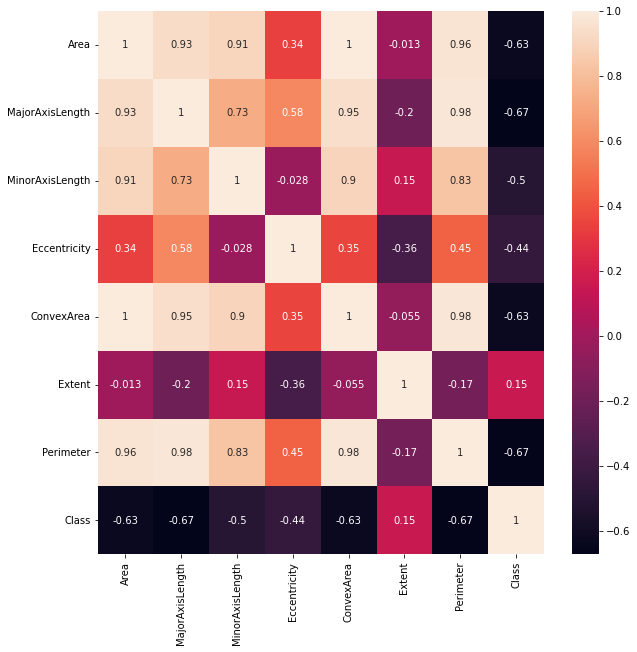

In [28]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(kdata.corr(), annot=True)

In [29]:
#--------------------Split the Dataset-------------------- 
kdata.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [30]:
y=kdata['Class']
y

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int32

In [32]:
x=kdata.drop(['Class'],axis=1)
x.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [33]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

In [49]:
x_train.shape

(630, 7)

In [50]:
x_test.shape

(270, 7)

In [51]:
y_train.shape

(630,)

In [52]:
y_test.shape

(270,)

In [34]:
sc = StandardScaler()

In [35]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#--------------------model training--------------------

In [36]:
#model
knn_model=KNeighborsClassifier()

In [37]:
#fit
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
#prediction
y_pred=knn_model.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       129
           1       0.85      0.82      0.83       141

    accuracy                           0.83       270
   macro avg       0.83      0.83      0.83       270
weighted avg       0.83      0.83      0.83       270



In [40]:
conmat=confusion_matrix(y_test, y_pred)
conmat

array([[109,  20],
       [ 26, 115]], dtype=int64)

<AxesSubplot:>

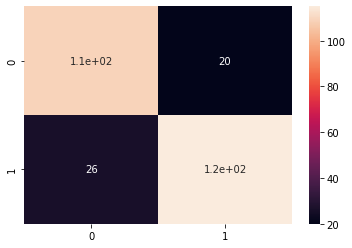

In [46]:
sns.heatmap(pd.DataFrame(conmat),annot=True)

In [53]:
y_test.value_counts()

1    141
0    129
Name: Class, dtype: int64

In [ ]:
#comment: the confusion matrix predicted 115 TP value correctly and 26 FP not correct for class 1 (postive class),
#and predicted 109 TN value correctly and 20 FN not correct for class 0 (negative class)

In [41]:
score=[]
for i in range (1,30) :
    #model
    knn_model=KNeighborsClassifier(n_neighbors=i)
    #fit
    knn_model.fit(x_train, y_train)
    
    score.append(knn_model.score(x_test, y_test))

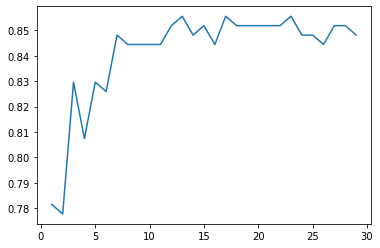

In [42]:
plt.plot(range(1,30), score)

In [43]:
parameters={
    "n_neighbors" : list(range(1,30)),
    "p":[1,2] 
}

gs=GridSearchCV(knn_model,parameters,cv=5)

#fit
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [44]:
print(gs.best_params_)

{'n_neighbors': 19, 'p': 2}


In [45]:
print(gs.best_score_)

0.8746031746031747


In [ ]:
#comment: the best parameter is equal 19 using the euclidian distance and the score is equal 0.87 
# which is a bit better than the accuracy score stated in the classification report (=0.83)

In [ ]:
#--------------------Naive Bayes--------------------

In [54]:
from sklearn.naive_bayes import GaussianNB

In [70]:
#model
nb_model = GaussianNB()

In [71]:
#fit
nb_model.fit(x_train, y_train)

GaussianNB()

In [72]:
#predict
nb_y_pred =nb_model.predict(x_test)

In [73]:
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        86
           1       0.79      0.91      0.85        94

    accuracy                           0.83       180
   macro avg       0.84      0.82      0.82       180
weighted avg       0.84      0.83      0.83       180



In [74]:
nb_cm=confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[63, 23],
       [ 8, 86]], dtype=int64)

<AxesSubplot:>

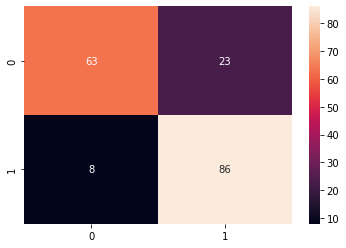

In [75]:
sns.heatmap(pd.DataFrame(nb_cm),annot=True)

In [76]:
y_test.value_counts()

1    94
0    86
Name: Class, dtype: int64

In [ ]:
#comment: the confusion matrix predicted 86 TP value correctly and 8 FP not correct for class 1 (postive class),
#and predicted 63 TN value correctly and 23 FN not correct for class 0 (negative class)